In [1]:
import pandas as pd 
import numpy as np 
import sklearn
from PipeLine import PipeLine
import matplotlib.pyplot as plt 

In [70]:
d = PipeLine('hist_data/H/AUDUSD.csv')
d.read_data()
d.set_datetime_index()
d.make_features()

In [71]:
len(X)

15000

In [72]:
X = d.final.iloc[:15000,:].values
X_test = d.final.iloc[15000:,:].values
X_testdf = d.final.iloc[15000:,:]
y = d.y.iloc[:15000].values
y_test= d.y.iloc[15000:].values

In [64]:
class Model(object):
    """"""
    def __init__(self, model, X, y):
        self.model = model
        self.X = X 
        self.y = y
        self.X_is_scaled = False
        self._train_accuracy = None 
        self._out_of_sample_accuracy = None 
        self._cvs_mean = None
        self._cvs_std = None
        self.X_train, self.X_test, self.y_train, self.y_test,self.y_pred =[None]*5
        self._learning_curve, self._validation_curve = [None]*2
        self.best_model = None
    
    def pre_proc():
        """Scal all features"""
        from sklearn.preprocessing import StandardScaler
        ss = StandardScaler()
        self.X = ss.fit_transform(X)
        self.X_is_scaled = True
        
    def train(self):
        """Train the model."""
        self.model.fit(self.X,self.y)
    
    def train_accuracy(self):
        """Calculate the classification accuracy on the training data."""
        from sklearn.metrics import accuracy_score
        y_pred = self.model.predict(self.X)
        ta = accuracy_score(self.y, y_pred)
        self._train_accuracy = ta
        return ta
    
    def out_of_sample_accurcy(self,test_percentage=0.25):
        """Out of sample accuracy score."""
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import accuracy_score
        X_train,X_test,y_train,y_test=\
        train_test_split(self.X, self.y, test_size=test_percentage)
        self.X_train, self.X_test, self.y_train, self.y_test =\
        X_train,X_test,y_train,y_test
        self.model.fit(X_train,y_train)
        y_pred = self.model.predict(X_test)
        oosa = accuracy_score(y_test,y_pred)
        self.y_pred = y_pred
        self._out_of_sample_accuracy = oosa
        return oosa
    
    def K_fold_cv(self, cv=10):
        """K forld cross validation."""
        from sklearn.model_selection import cross_val_score
        cvs = cross_val_score(self.model, self.X,self.y,cv=cv)
        self._cvs_mean = np.mean(cvs)
        self._cvs_std = np.std(cvs)
        return ('cvs_mean = {} | cvs_std = {}'.format(np.mean(cvs),np.std(cvs)))
        
    def predict(self,x):
        """Predict the class of a given numpy array
        Return a numpy array containing the predictions."""
        self.model.predict(x)
    
    def confusion_matrix(self):
        """Creat a confusion matrix."""
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(self.y_test,self.y_pred)
        self._confusion_matrix = cm
        return cm
        
    def learning_curve(self):
        """"""
        from sklearn.model_selection import learning_curve
        train_sizes, train_scores, test_scores = learning_curve(estimator=self.model,
                                                        X=self.X, y=self.y,
                                                        train_sizes=np.linspace(0.1, 1, 20),
                                                        cv=10, n_jobs=-1)
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        
        plt.figure(figsize=(14,7))
        plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy',alpha=0.5)
        
        plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

        plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy',alpha=0.5)

        plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

        plt.xlabel('Number of training samples')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        self._learning_curve =  plt.gcf()
        

#     def validation_curve():
#         """"""
#         param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
#         train_scores, test_scores = validation_curve(
#                 estimator=self.model, 
#                 X=self.X, 
#                 y=self.y, 
#                 param_name= # remember to fix this 
#                 param_range=param_range
#                 cv=10,
#                 n_jobs=-1)

#         train_mean = np.mean(train_scores, axis=1)
#         train_std = np.std(train_scores, axis=1)
#         test_mean = np.mean(test_scores, axis=1)
#         test_std = np.std(test_scores, axis=1)
        
        
#         plt.figure(figsize=(14,7))
#         plt.plot(param_range, train_mean, 
#                  color='blue', marker='o', 
#                  markersize=5, label='training accuracy')

#         plt.fill_between(param_range, train_mean + train_std,
#                          train_mean - train_std, alpha=0.15,
#                          color='blue')

#         plt.plot(param_range, test_mean, 
#                  color='green', linestyle='--', 
#                  marker='s', markersize=5, 
#                  label='validation accuracy')

#         plt.fill_between(param_range, 
#                          test_mean + test_std,
#                          test_mean - test_std, 
#                          alpha=0.15, color='green')


#         plt.legend(loc='lower right')
#         plt.xlabel('Parameter C')
#         plt.ylabel('Accuracy')
#         self._validation_curve = plt.gcf()
        
    def optmize():
        """Return the best asstmator based on a grid search"""
        #in that function i will set the best_model 
        #use dask for the grid_search i think it was dask_grid_search 
        pass
    def make_pipleline():
        """"""
        pass

### how to use

In [74]:
from xgboost import XGBClassifier
m = XGBClassifier(n_estimators=1000)
# from sklearn.svm import SVC
# m = SVC()

In [75]:
m.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
data = X_testdf

In [79]:
data['y'] = y_test

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
data

,volume,U_D,up_shadow,lo_shadow,body,range,price_change,sma_3_change,sma_5_change,sma_10_change,y
2016-11-13 22:00,3272,0,-0.00139,0.00108,0.00058,0.00189,3.500000e-05,0.000198,-0.000205,-4.580000e-04,0.0
2016-11-13 23:00,10863,0,-0.00133,0.00062,0.00023,0.00172,3.650000e-04,0.000338,-0.000042,-4.660000e-04,1.0
2016-11-14 00:00,10926,1,-0.00133,0.00258,-0.00120,0.00271,-4.750000e-04,-0.000025,0.000097,-2.295000e-04,0.0
2016-11-14 01:00,13131,0,-0.00090,0.00170,0.00024,0.00236,-5.000000e-04,-0.000203,0.000008,-1.650000e-05,0.0
2016-11-14 02:00,9522,0,-0.00165,0.00161,0.00133,0.00193,7.850000e-04,-0.000063,0.000042,1.500000e-05,1.0
2016-11-14 03:00,7051,1,-0.00072,0.00088,-0.00013,0.00147,5.900000e-04,0.000292,0.000153,-2.600000e-05,1.0
2016-11-14 04:00,5670,1,-0.00077,0.00076,-0.00066,0.00087,-3.350000e-04,0.000347,0.000013,-1.450000e-05,1.0
2016-11-14 05:00,6865,1,-0.00076,0.00141,-0.00052,0.00165,-6.000000e-04,-0.000115,-0.000012,4.250000e-05,0.0
2016-11-14 06:00,5653,0,-0.00095,0.00034,0.00026,0.00103,-1.200000e-04,-0.000352,0.000064,3.600000e-05,0.0
2016-11-14 07:00,11458,0,-0.00145,0.00121,0.00095,0.00171,6.550000e-04,-0.000022,0.000038,4.000000e-05,1.0


In [81]:
data['prob1'] =  (m.predict_proba(X_test)[:,0])
data['prob0'] =  (m.predict_proba(X_test)[:,1])

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [82]:
data

,volume,U_D,up_shadow,lo_shadow,body,range,price_change,sma_3_change,sma_5_change,sma_10_change,y,prob1,prob0
2016-11-13 22:00,3272,0,-0.00139,0.00108,0.00058,0.00189,3.500000e-05,0.000198,-0.000205,-4.580000e-04,0.0,0.497430,0.502570
2016-11-13 23:00,10863,0,-0.00133,0.00062,0.00023,0.00172,3.650000e-04,0.000338,-0.000042,-4.660000e-04,1.0,0.412348,0.587652
2016-11-14 00:00,10926,1,-0.00133,0.00258,-0.00120,0.00271,-4.750000e-04,-0.000025,0.000097,-2.295000e-04,0.0,0.506203,0.493797
2016-11-14 01:00,13131,0,-0.00090,0.00170,0.00024,0.00236,-5.000000e-04,-0.000203,0.000008,-1.650000e-05,0.0,0.365108,0.634892
2016-11-14 02:00,9522,0,-0.00165,0.00161,0.00133,0.00193,7.850000e-04,-0.000063,0.000042,1.500000e-05,1.0,0.505421,0.494579
2016-11-14 03:00,7051,1,-0.00072,0.00088,-0.00013,0.00147,5.900000e-04,0.000292,0.000153,-2.600000e-05,1.0,0.562997,0.437003
2016-11-14 04:00,5670,1,-0.00077,0.00076,-0.00066,0.00087,-3.350000e-04,0.000347,0.000013,-1.450000e-05,1.0,0.508051,0.491949
2016-11-14 05:00,6865,1,-0.00076,0.00141,-0.00052,0.00165,-6.000000e-04,-0.000115,-0.000012,4.250000e-05,0.0,0.573978,0.426022
2016-11-14 06:00,5653,0,-0.00095,0.00034,0.00026,0.00103,-1.200000e-04,-0.000352,0.000064,3.600000e-05,0.0,0.453154,0.546846
2016-11-14 07:00,11458,0,-0.00145,0.00121,0.00095,0.00171,6.550000e-04,-0.000022,0.000038,4.000000e-05,1.0,0.423374,0.576626


In [83]:
data['predy'] = m.predict(X_test)

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [84]:
w = data[['y','prob1','prob0','predy']]

In [87]:
w = w[(w.prob1 >= 0.) | (w.prob0 >= 0.6)]

In [88]:
sum(w.y == w.predy)/len(w)

0.49650349650349651

In [90]:
accuracy_score(data.y,data.predy)

0.50886574725584011

In [21]:
model = Model(m, X, y)

In [22]:
model.train()

In [23]:
model.train_accuracy()

0.67746456098744134

In [24]:
model.out_of_sample_accurcy()

0.49148523388661347

In [25]:
model.confusion_matrix()

array([[1223, 1095],
       [1264, 1057]])

In [31]:
%matplotlib inline

In [32]:
model._confusion_matrix

array([[1280, 1094],
       [1175, 1090]])

In [ ]:
model.learning_curve()

In [ ]:
model._learning_curve

In [86]:
m.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
model

In [ ]:
#moeny
accout_balance = 1000

#read data from the new desk as a data frame
x_['y'] = y_

In [75]:
s = x_.drop('y',axis=1).values

In [78]:
m.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

,volume,U_D,up_shadow,lo_shadow,body,range,price_change,sma_3_change,sma_5_change,sma_10_change,y,pred


In [87]:
# x_tt.dropna(inplace=True)
x_tt['pred'] = m.predict(x_tt.values)

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [91]:
#track the account balance
x_tt['y'] = y_tt

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [60]:
data = x_.copy()

In [92]:
data = x_tt.copy()

In [94]:
DATA = data[["y","pred"]]

In [106]:
account_int = 1000
acc_hist = [0]

In [107]:
for i,x in DATA.iterrows():
    risk = (account_int/100)
    if x['y'] == x['pred']:
        last = acc_hist[-1]
        acc_hist.append((risk+(risk*(70/100)))+last)
        account_int = acc_hist[-1]
    else:
        acc_hist.append(-risk)
        account_int = acc_hist[-1]

In [115]:
a = 1000
for i,x in DATA.iterrows():
    if x['y'] == x['pred']:
        a+=(1.7/100)*a
    else:
        a-=(1/100)*a

In [116]:
a

5.0685827247715624e+26

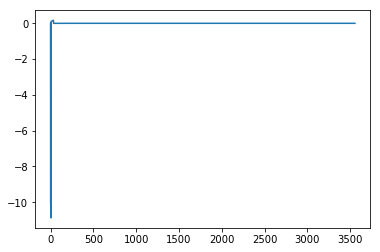

In [110]:
plt.plot(acc_hist)

In [109]:
acc_hist

[0,
 -10.0,
 -10.17,
 -10.34289,
 -10.518719130000001,
 -10.69753735521,
 -10.879395490248571,
 0.10879395490248571,
 0.11064345213582796,
 0.11252439082213704,
 0.11443730546611337,
 0.1163827396590373,
 0.11836124623324093,
 0.12037338741920603,
 0.12241973500533253,
 0.12450087050042317,
 0.12661738529893038,
 0.1287698808490122,
 0.1309589688234454,
 0.13318527129344399,
 0.13544942090543252,
 0.13775206106082488,
 0.14009384609885892,
 0.14247544148253952,
 0.1448975239877427,
 0.1473607818955343,
 0.14986591518775838,
 0.15241363574595027,
 0.15500466755363143,
 0.15763974690204316,
 0.1603196225993779,
 0.16304505618356732,
 0.16581682213868795,
 0.16863570811504563,
 0.1715025151530014,
 -0.001715025151530014,
 -0.0017441805791060243,
 -0.0017738316489508267,
 -0.0018039867869829908,
 -0.0018346545623617015,
 -0.0018658436899218504,
 -0.001897563032650522,
 -0.0019298216042055807,
 -0.0019626285714770754,
 -0.0019959932571921857,
 -0.002029925142564453,
 -0.0020644338699880487,